# Full Coalition Cabinet Regression Analysis
This notebook includes:
1. Linear regressions with raw vote and seat shares.
2. Log-transformed regressions with vote and seat shares.
All single-party cabinets (share_cab_pos = 1) are excluded.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
file_path = "All_data_coalitions.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Filter out cabinets with only one party
df_filtered = df[df['share_cab_pos'] < 1].copy()

# Create F dummy variable
df_filtered['F_dummy'] = df_filtered['F'].fillna(0).astype(int)


## Raw Share-Based Regressions

In [2]:
# Model 1: share_cab_pos ~ gov_weight_share
X1 = sm.add_constant(df_filtered['gov_weight_share'])
model1 = sm.OLS(df_filtered['share_cab_pos'], X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          share_cab_pos   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     775.4
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.30e-81
Time:                        18:51:44   Log-Likelihood:                 242.12
No. Observations:                 274   AIC:                            -480.2
Df Residuals:                     272   BIC:                            -473.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0513      0.012  

In [3]:
# Model 2: share_cab_pos ~ gov_weight_share + F_dummy
X2 = sm.add_constant(df_filtered[['gov_weight_share', 'F_dummy']])
model2 = sm.OLS(df_filtered['share_cab_pos'], X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          share_cab_pos   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     391.6
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.16e-80
Time:                        18:51:44   Log-Likelihood:                 243.50
No. Observations:                 274   AIC:                            -481.0
Df Residuals:                     271   BIC:                            -470.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0570      0.012  

In [4]:
# Model 3: share_cab_pos ~ gov_seat_share
X3 = sm.add_constant(df_filtered['gov_seat_share'])
model3 = sm.OLS(df_filtered['share_cab_pos'], X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          share_cab_pos   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1458.
Date:                Fri, 30 May 2025   Prob (F-statistic):          2.81e-111
Time:                        18:51:44   Log-Likelihood:                 310.86
No. Observations:                 274   AIC:                            -617.7
Df Residuals:                     272   BIC:                            -610.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0572      0.009      6.

In [5]:
# Model 4: share_cab_pos ~ gov_seat_share + F_dummy
X4 = sm.add_constant(df_filtered[['gov_seat_share', 'F_dummy']])
model4 = sm.OLS(df_filtered['share_cab_pos'], X4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          share_cab_pos   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     749.5
Date:                Fri, 30 May 2025   Prob (F-statistic):          3.69e-111
Time:                        18:51:44   Log-Likelihood:                 314.50
No. Observations:                 274   AIC:                            -623.0
Df Residuals:                     271   BIC:                            -612.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0500      0.009      5.

## Log-Transformed Share-Based Regressions

In [6]:
# Filter out rows with non-positive share values before log transformation
df_log_filtered = df_filtered[(df_filtered['share_seats'] > 0) & 
                              (df_filtered['share_votes'] > 0)].copy()

# Compute log-transformed variables
df_log_filtered['ln_share_seats'] = np.log(df_log_filtered['share_seats'])
df_log_filtered['ln_share_voting_weights'] = np.log(df_log_filtered['share_votes'])


In [7]:
# Model 1: share_cab_pos ~ ln(share_votes)
X1_log = sm.add_constant(df_log_filtered['ln_share_voting_weights'])
model1_log = sm.OLS(df_log_filtered['share_cab_pos'], X1_log).fit()
print(model1_log.summary())

                            OLS Regression Results                            
Dep. Variable:          share_cab_pos   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     586.0
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.04e-69
Time:                        18:51:44   Log-Likelihood:                 214.71
No. Observations:                 273   AIC:                            -425.4
Df Residuals:                     271   BIC:                            -418.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [8]:
# Model 2: share_cab_pos ~ ln(share_votes) + F_dummy
X2_log = sm.add_constant(df_log_filtered[['ln_share_voting_weights', 'F_dummy']])
model2_log = sm.OLS(df_log_filtered['share_cab_pos'], X2_log).fit()
print(model2_log.summary())

                            OLS Regression Results                            
Dep. Variable:          share_cab_pos   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     316.7
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.54e-71
Time:                        18:51:44   Log-Likelihood:                 222.42
No. Observations:                 273   AIC:                            -438.8
Df Residuals:                     270   BIC:                            -428.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [9]:
# Model 3: share_cab_pos ~ ln(share_seats)
X3_log = sm.add_constant(df_log_filtered['ln_share_seats'])
model3_log = sm.OLS(df_log_filtered['share_cab_pos'], X3_log).fit()
print(model3_log.summary())

                            OLS Regression Results                            
Dep. Variable:          share_cab_pos   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     524.4
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.60e-65
Time:                        18:51:44   Log-Likelihood:                 204.53
No. Observations:                 273   AIC:                            -405.1
Df Residuals:                     271   BIC:                            -397.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7218      0.018     39.

In [10]:
# Model 4: share_cab_pos ~ ln(share_seats) + F_dummy
X4_log = sm.add_constant(df_log_filtered[['ln_share_seats', 'F_dummy']])
model4_log = sm.OLS(df_log_filtered['share_cab_pos'], X4_log).fit()
print(model4_log.summary())

                            OLS Regression Results                            
Dep. Variable:          share_cab_pos   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     295.3
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.08e-68
Time:                        18:51:44   Log-Likelihood:                 215.80
No. Observations:                 273   AIC:                            -425.6
Df Residuals:                     270   BIC:                            -414.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6348      0.025     25.

# Plots and graphs

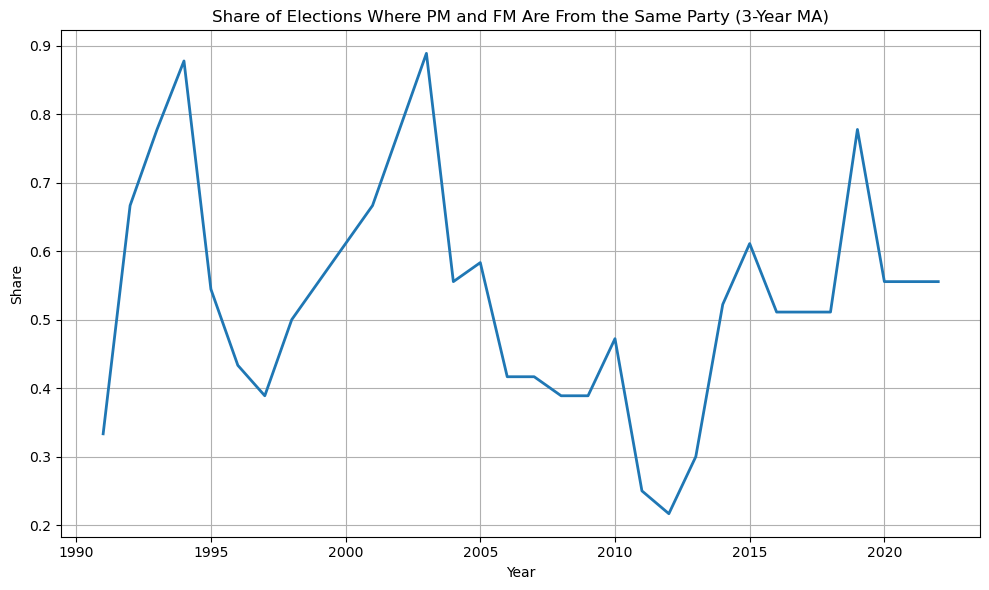

C:\Users\lucas\AppData\Local\Temp\ipykernel_6820\127488462.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_non_pm_df['year'] = pd.to_datetime(fam_non_pm_df['election_date']).dt.year


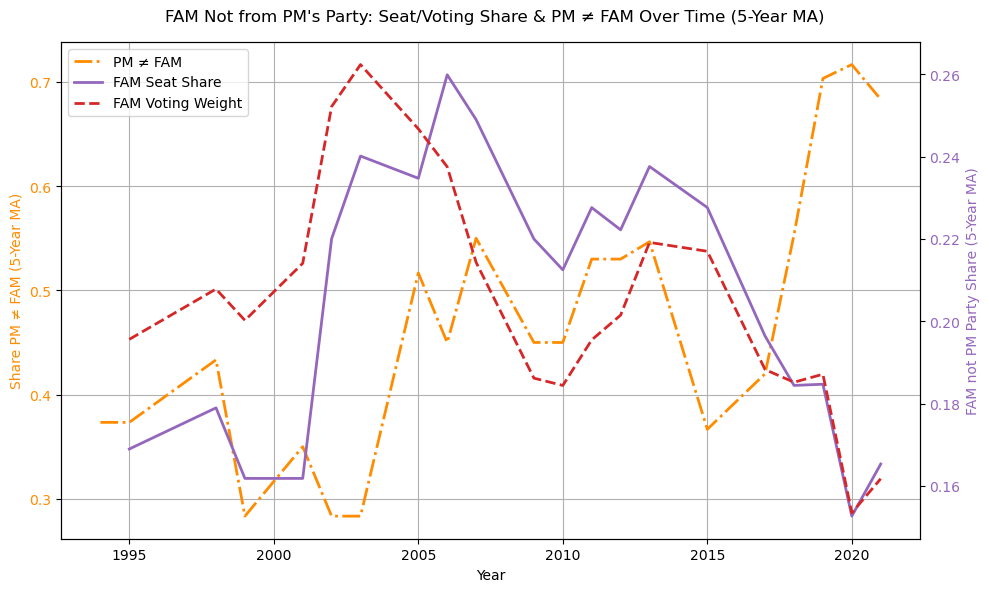

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
file_path = "All_data_coalitions.xlsx"  # make sure this file is in the same directory
df = pd.read_excel(file_path, sheet_name="Sheet1")

# === Remove majority elections ===
majority_elections = df[df['share_seats'] > 0.5]['election_date'].unique()
df_no_majority = df[~df['election_date'].isin(majority_elections)]

# === Plot 1: PM and FM same party (3-year MA) ===
pm_fm_df = df_no_majority[['election_date', 'partyID', 'PM', 'FM']].dropna(subset=['PM', 'FM'])
pm_fm_df['is_pm'] = pm_fm_df['PM'] == 1
pm_fm_df['is_fm'] = pm_fm_df['FM'] == 1

def same_party_pm_fm(group):
    pm = group[group['is_pm']].partyID.values
    fm = group[group['is_fm']].partyID.values
    return len(pm) == 1 and len(fm) == 1 and pm[0] == fm[0]

pm_fm_same = pm_fm_df.groupby('election_date').apply(same_party_pm_fm).reset_index(name='same_party')
pm_fm_same['year'] = pd.to_datetime(pm_fm_same['election_date']).dt.year
pm_fm_same['same_party'] = pm_fm_same['same_party'].astype(int)

pm_fm_yearly = pm_fm_same.groupby('year')['same_party'].mean().reset_index()
pm_fm_yearly['share_same_party_PM_FM_MA3'] = pm_fm_yearly['same_party'].rolling(window=3, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(pm_fm_yearly['year'], pm_fm_yearly['share_same_party_PM_FM_MA3'],
         color='tab:blue', linewidth=2)
plt.title("Share of Elections Where PM and FM Are From the Same Party (3-Year MA)")
plt.xlabel("Year")
plt.ylabel("Share")
plt.grid(True)
plt.tight_layout()
plt.show()

# === FAM ≠ PM party seat/vote shares (5-year MA) ===
fam_df = df_no_majority[['election_date', 'partyID', 'FAM', 'PM', 'share_seats', 'share_voting_weight']].dropna(subset=['FAM'])
fam_non_pm_df = fam_df[(fam_df['FAM'] == 1) & (fam_df['PM'] != 1)]
fam_non_pm_df['year'] = pd.to_datetime(fam_non_pm_df['election_date']).dt.year

fam_non_pm_summary = fam_non_pm_df.groupby('year')[['share_seats', 'share_voting_weight']].mean().reset_index()
fam_non_pm_summary.rename(columns={
    'share_seats': 'avg_share_seats_FAM_non_PM',
    'share_voting_weight': 'avg_voting_weight_FAM_non_PM'
}, inplace=True)

fam_non_pm_summary['seats_MA5'] = fam_non_pm_summary['avg_share_seats_FAM_non_PM'].rolling(window=5, center=True).mean()
fam_non_pm_summary['voting_MA5'] = fam_non_pm_summary['avg_voting_weight_FAM_non_PM'].rolling(window=5, center=True).mean()

# === PM ≠ FAM per election ===
pm_fam_df = df_no_majority[['election_date', 'partyID', 'PM', 'FAM']].dropna(subset=['PM', 'FAM'])
pm_fam_df['is_pm'] = pm_fam_df['PM'] == 1
pm_fam_df['is_fam'] = pm_fam_df['FAM'] == 1

def pm_fam_same_party(group):
    pm = group[group['is_pm']].partyID.values
    fam = group[group['is_fam']].partyID.values
    return len(pm) == 1 and len(fam) == 1 and pm[0] == fam[0]

pm_fam_same = pm_fam_df.groupby('election_date').apply(pm_fam_same_party).reset_index(name='same_party')
pm_fam_same['year'] = pd.to_datetime(pm_fam_same['election_date']).dt.year
pm_fam_same['diff_party'] = ~pm_fam_same['same_party']

pm_fam_diff_by_year = pm_fam_same.groupby('year')['diff_party'].mean().reset_index()
pm_fam_diff_by_year['share_PM_FAM_diff_party_MA5'] = pm_fam_diff_by_year['diff_party'].rolling(window=5, center=True).mean()

# === Combine and plot ===
combined_fam_df = pd.merge(fam_non_pm_summary[['year', 'seats_MA5', 'voting_MA5']],
                           pm_fam_diff_by_year[['year', 'share_PM_FAM_diff_party_MA5']],
                           on='year', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 6))

# PM ≠ FAM on left
ax1.set_xlabel("Year")
ax1.set_ylabel("Share PM ≠ FAM (5-Year MA)", color='darkorange')
ax1.plot(combined_fam_df['year'], combined_fam_df['share_PM_FAM_diff_party_MA5'],
         color='darkorange', linewidth=2, linestyle='-.', label='PM ≠ FAM')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax1.grid(True)

# FAM seat/vote shares on right
ax2 = ax1.twinx()
ax2.set_ylabel("FAM not PM Party Share (5-Year MA)", color='tab:purple')
ax2.plot(combined_fam_df['year'], combined_fam_df['seats_MA5'],
         label='FAM Seat Share', color='tab:purple', linewidth=2)
ax2.plot(combined_fam_df['year'], combined_fam_df['voting_MA5'],
         label='FAM Voting Weight', color='tab:red', linewidth=2, linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:purple')

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.suptitle("FAM Not from PM's Party: Seat/Voting Share & PM ≠ FAM Over Time (5-Year MA)")
fig.tight_layout()
plt.show()

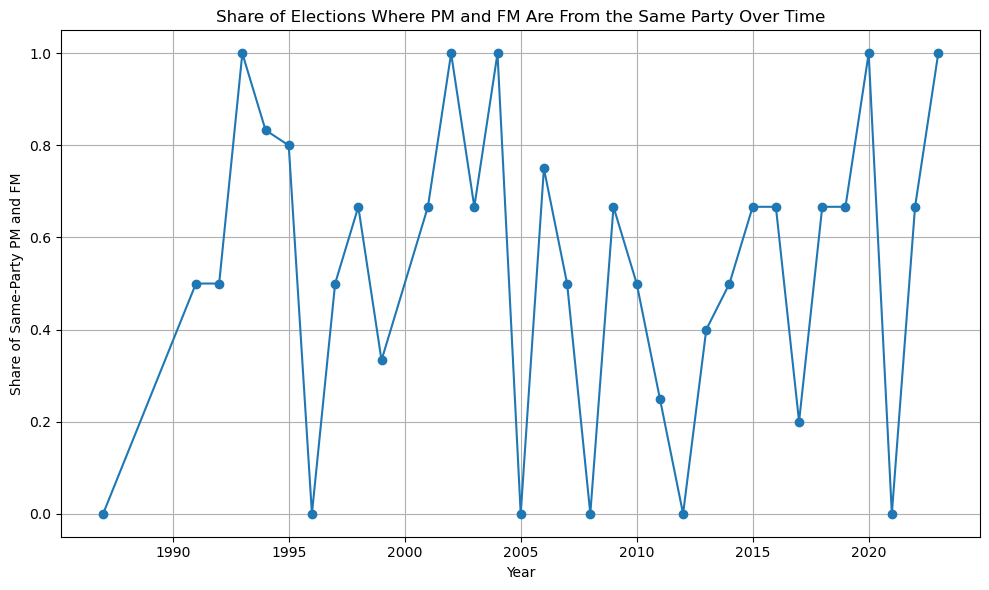

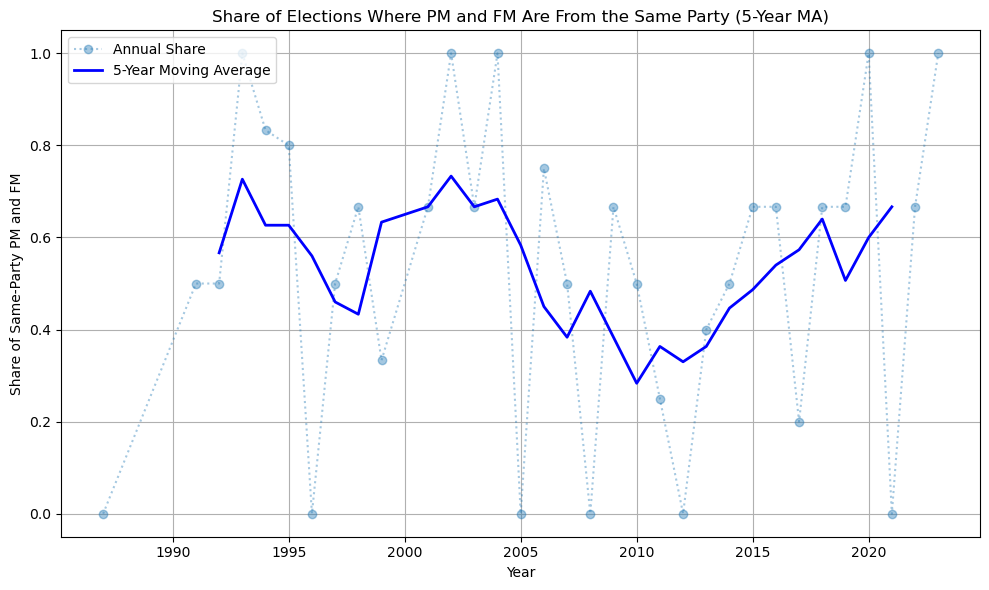

In [21]:
# Re-import and process the file after upload
file_path = "All_data_coalitions.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
# Remove majority governments
majority_elections = df[df['share_seats'] > 0.5]['election_date'].unique()
df_no_majority = df[~df['election_date'].isin(majority_elections)]

# Filter relevant rows with non-null PM and FM info
pm_fm_df = df_no_majority[['election_date', 'partyID', 'PM', 'FM']].dropna(subset=['PM', 'FM'])

# Create flags for whether the party held PM or FM
pm_fm_df['is_pm'] = pm_fm_df['PM'] == 1
pm_fm_df['is_fm'] = pm_fm_df['FM'] == 1

# Determine if the same party holds both PM and FM
def same_party_pm_fm(group):
    pm_party = group[group['is_pm']].partyID.values
    fm_party = group[group['is_fm']].partyID.values
    return len(pm_party) == 1 and len(fm_party) == 1 and pm_party[0] == fm_party[0]

# Apply to each election
same_party_counts = pm_fm_df.groupby('election_date').apply(same_party_pm_fm).reset_index(name='same_party')

# Convert election_date to year
same_party_counts['year'] = pd.to_datetime(same_party_counts['election_date']).dt.year

# Calculate yearly average
yearly_stats = same_party_counts.groupby('year')['same_party'].agg(['mean', 'count']).reset_index()
yearly_stats.rename(columns={'mean': 'share_same_party_PM_FM'}, inplace=True)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats['year'], yearly_stats['share_same_party_PM_FM'], marker='o')
plt.title("Share of Elections Where PM and FM Are From the Same Party Over Time")
plt.xlabel("Year")
plt.ylabel("Share of Same-Party PM and FM")
plt.grid(True)
plt.tight_layout()
plt.show()
# Apply 5-year moving average to the share of same-party PM and FM
yearly_stats['share_same_party_PM_FM_MA5'] = yearly_stats['share_same_party_PM_FM'].rolling(window=5, center=True).mean()

# Plot with 5-year moving average
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats['year'], yearly_stats['share_same_party_PM_FM'], marker='o', linestyle=':', alpha=0.4, label='Annual Share')
plt.plot(yearly_stats['year'], yearly_stats['share_same_party_PM_FM_MA5'], color='blue', linewidth=2, label='5-Year Moving Average')
plt.title("Share of Elections Where PM and FM Are From the Same Party (5-Year MA)")
plt.xlabel("Year")
plt.ylabel("Share of Same-Party PM and FM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

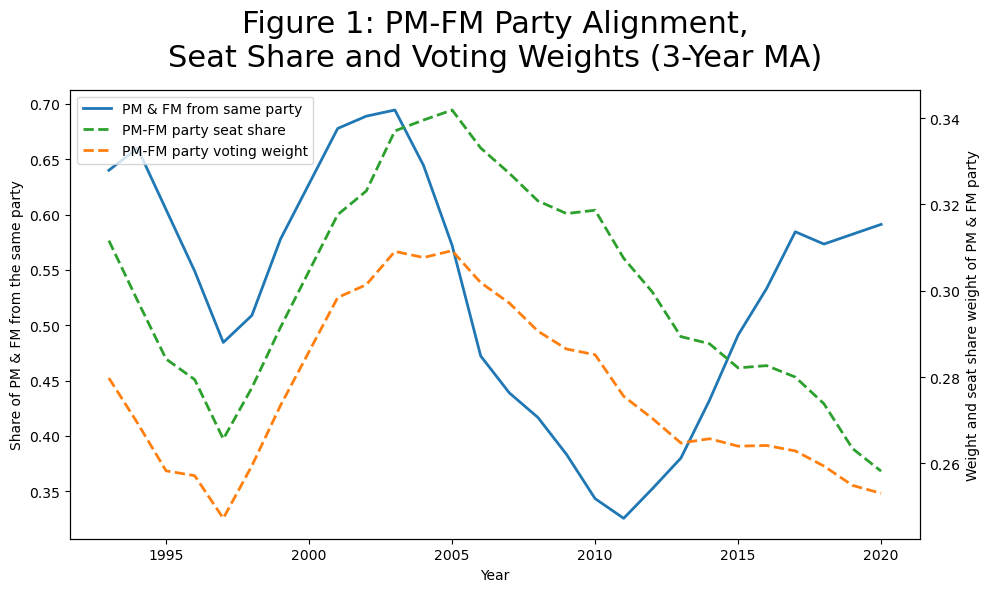

In [ ]:
# Filter to parties that held the PM position
pm_parties = df_no_majority[df_no_majority['PM'] == 1][['election_date', 'share_seats']].copy()
pm_parties['year'] = pd.to_datetime(pm_parties['election_date']).dt.year

# Calculate average PM party seat share per year
pm_seat_by_year = pm_parties.groupby('year')['share_seats'].mean().reset_index()
pm_seat_by_year.rename(columns={'share_seats': 'avg_pm_party_seat_share'}, inplace=True)

# Calculate 5-year moving average
pm_seat_by_year['avg_pm_party_seat_share_MA5'] = pm_seat_by_year['avg_pm_party_seat_share'].rolling(window=5, center=True).mean()

# Merge the two datasets on year for combined plotting
combined_df = pd.merge(yearly_stats[['year', 'share_same_party_PM_FM_MA5']],
                       pm_seat_by_year[['year', 'avg_pm_party_seat_share_MA5']],
                       on='year', how='inner')

# Prepare voting weight share (correctly using 'share_voting_weight') for PM parties
pm_voting_df = df_no_majority[df_no_majority['PM'] == 1][['election_date', 'share_voting_weight']].copy()
pm_voting_df['year'] = pd.to_datetime(pm_voting_df['election_date']).dt.year

# Compute average voting weight by year and calculate 5-year moving average
pm_voting_by_year = pm_voting_df.groupby('year')['share_voting_weight'].mean().reset_index()
pm_voting_by_year.rename(columns={'share_voting_weight': 'avg_pm_party_voting_weight'}, inplace=True)
pm_voting_by_year['avg_pm_party_voting_weight_MA5'] = pm_voting_by_year['avg_pm_party_voting_weight'].rolling(window=5, center=True).mean()

# Merge updated voting weight into combined dataset
combined_df = combined_df.drop(columns=['avg_pm_party_voting_weight_MA5'], errors='ignore')  # remove old column if exists
combined_df = pd.merge(combined_df, pm_voting_by_year[['year', 'avg_pm_party_voting_weight_MA5']], on='year', how='inner')

# Recalculate 2-year moving averages (centered)
combined_df['share_same_party_PM_FM_MA2'] = combined_df['share_same_party_PM_FM_MA5'].rolling(window=2, center=True).mean()
combined_df['avg_pm_party_seat_share_MA2'] = combined_df['avg_pm_party_seat_share_MA5'].rolling(window=2, center=True).mean()
combined_df['avg_pm_party_voting_weight_MA2'] = combined_df['avg_pm_party_voting_weight_MA5'].rolling(window=2, center=True).mean()

# Recalculate 3-year centered moving averages
combined_df['share_same_party_PM_FM_MA3'] = combined_df['share_same_party_PM_FM_MA5'].rolling(window=3, center=True).mean()
combined_df['avg_pm_party_seat_share_MA3'] = combined_df['avg_pm_party_seat_share_MA5'].rolling(window=3, center=True).mean()
combined_df['avg_pm_party_voting_weight_MA3'] = combined_df['avg_pm_party_voting_weight_MA5'].rolling(window=3, center=True).mean()

# Plot with 3-year moving averages
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: PM & FM same party
color1 = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("Share of PM & FM from the same party")
ax1.plot(combined_df['year'], combined_df['share_same_party_PM_FM_MA3'], linewidth=2, label='PM & FM from same party')
ax1.tick_params(axis='y')
ax1.grid(False)

# Right y-axis: PM seat share and voting weight
ax2 = ax1.twinx()

color2 = 'tab:green'
color3 = 'tab:orange'
color4 = 'tab:black'

ax2.set_ylabel("Share of seats and voting weights of PM-FM party")
ax2.plot(combined_df['year'], combined_df['avg_pm_party_seat_share_MA3'],
         color=color2, linewidth=2, linestyle='--', label='PM-FM party seat share')
ax2.plot(combined_df['year'], combined_df['avg_pm_party_voting_weight_MA3'],
         color=color3, linewidth=2, linestyle='--', label='PM-FM party voting weight')
ax2.tick_params(axis='y')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title and layout
fig.suptitle("Figure 1: PM-FM Party Alignment,\nSeat Share and Voting Weights (3-Year MA)", fontsize=22)

fig.tight_layout()
plt.show()

In [67]:
# Filter for rows where the party held a FAM position but not the PM role
fam_df = df_no_majority[['election_date', 'partyID', 'FAM', 'PM', 'share_seats', 'share_voting_weight']].dropna(subset=['FAM'])

# Identify rows where FAM is 1 but PM is not 1
fam_non_pm_df = fam_df[(fam_df['FAM'] == 1) & (fam_df['PM'] != 1)]

# Convert election date to year
fam_non_pm_df['year'] = pd.to_datetime(fam_non_pm_df['election_date']).dt.year

# Group by year and calculate average share of seats and voting weight
fam_non_pm_summary = fam_non_pm_df.groupby('year')[['share_seats', 'share_voting_weight']].mean().reset_index()
fam_non_pm_summary.rename(columns={
    'share_seats': 'avg_share_seats_FAM_non_PM',
    'share_voting_weight': 'avg_voting_weight_FAM_non_PM'
}, inplace=True)

# Apply 3-year moving average
fam_non_pm_summary['seats_MA3'] = fam_non_pm_summary['avg_share_seats_FAM_non_PM'].rolling(window=3, center=True).mean()
fam_non_pm_summary['voting_MA3'] = fam_non_pm_summary['avg_voting_weight_FAM_non_PM'].rolling(window=3, center=True).mean()

C:\Users\lucas\AppData\Local\Temp\ipykernel_6820\1027338044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_non_pm_df['year'] = pd.to_datetime(fam_non_pm_df['election_date']).dt.year


In [68]:
# Prepare data with PM and FAM flags
pm_fam_df = df_no_majority[['election_date', 'partyID', 'PM', 'FAM']].dropna(subset=['PM', 'FAM'])

# Create boolean flags for PM and FAM
pm_fam_df['is_pm'] = pm_fam_df['PM'] == 1
pm_fam_df['is_fam'] = pm_fam_df['FAM'] == 1

# For each election, check if PM and FAM are from the same party
def pm_fam_same_party(group):
    pm_party = group[group['is_pm']].partyID.values
    fam_party = group[group['is_fam']].partyID.values
    return len(pm_party) == 1 and len(fam_party) == 1 and pm_party[0] == fam_party[0]

# Apply per election
pm_fam_same = pm_fam_df.groupby('election_date').apply(pm_fam_same_party).reset_index(name='same_party')

# Extract year and calculate proportion where PM and FAM are from different parties
pm_fam_same['year'] = pd.to_datetime(pm_fam_same['election_date']).dt.year
pm_fam_same['diff_party'] = ~pm_fam_same['same_party']

# Group by year and compute share of different-party PM/FAM combinations
pm_fam_diff_by_year = pm_fam_same.groupby('year')['diff_party'].mean().reset_index()
pm_fam_diff_by_year.rename(columns={'diff_party': 'share_PM_FAM_diff_party'}, inplace=True)

# Apply 3-year moving average
pm_fam_diff_by_year['share_PM_FAM_diff_party_MA3'] = pm_fam_diff_by_year['share_PM_FAM_diff_party'].rolling(window=3, center=True).mean()

In [69]:
# Merge the PM ≠ FAM data into the FAM non-PM dataframe
combined_fam_df = pd.merge(fam_non_pm_summary[['year', 'seats_MA3', 'voting_MA3']],
                           pm_fam_diff_by_year[['year', 'share_PM_FAM_diff_party_MA3']],
                           on='year', how='inner')

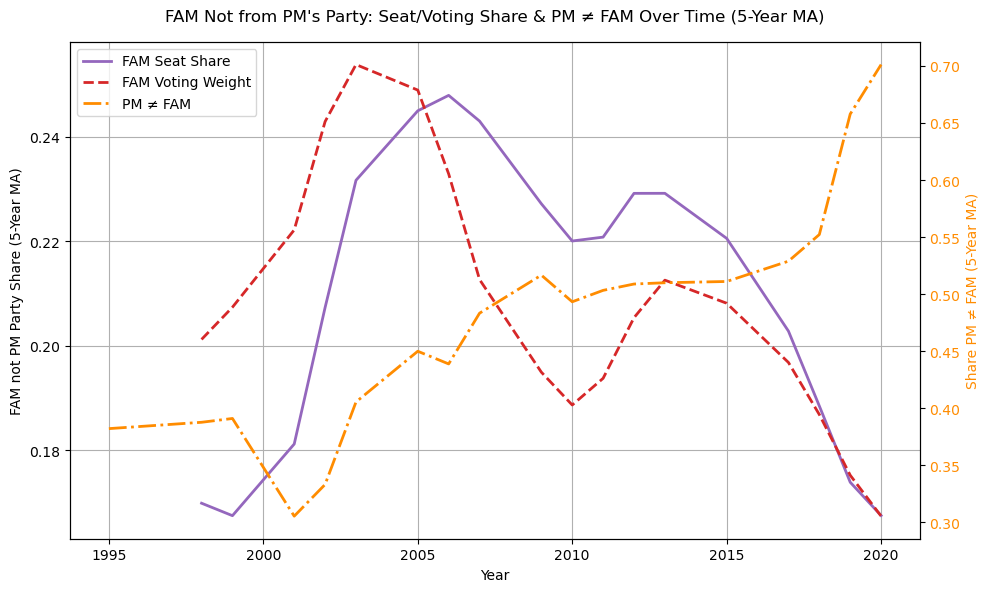

In [70]:
# Recalculate 5-year moving averages
combined_fam_df['seats_MA5'] = combined_fam_df['seats_MA3'].rolling(window=5, center=True).mean()
combined_fam_df['voting_MA5'] = combined_fam_df['voting_MA3'].rolling(window=5, center=True).mean()
combined_fam_df['share_PM_FAM_diff_party_MA5'] = combined_fam_df['share_PM_FAM_diff_party_MA3'].rolling(window=5, center=True).mean()

# Plot all three series with 5-year moving averages
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: seat and voting share of FAM not from PM's party
color1 = 'tab:purple'
color2 = 'tab:red'
ax1.set_xlabel("Year")
ax1.set_ylabel("FAM not PM Party Share (5-Year MA)")
ax1.plot(combined_fam_df['year'], combined_fam_df['seats_MA5'], label='FAM Seat Share', color=color1, linewidth=2)
ax1.plot(combined_fam_df['year'], combined_fam_df['voting_MA5'], label='FAM Voting Weight', color=color2, linewidth=2, linestyle='--')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# Right y-axis: share of elections where PM and FAM are from different parties
ax2 = ax1.twinx()
color3 = 'darkorange'
ax2.set_ylabel("Share PM ≠ FAM (5-Year MA)", color=color3)
ax2.plot(combined_fam_df['year'], combined_fam_df['share_PM_FAM_diff_party_MA5'],
         color=color3, linewidth=2, linestyle='-.', label='PM ≠ FAM')
ax2.tick_params(axis='y', labelcolor=color3)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Title and layout
fig.suptitle("FAM Not from PM's Party: Seat/Voting Share & PM ≠ FAM Over Time (5-Year MA)")
fig.tight_layout()
plt.show()

# Seat share vs voting weight 

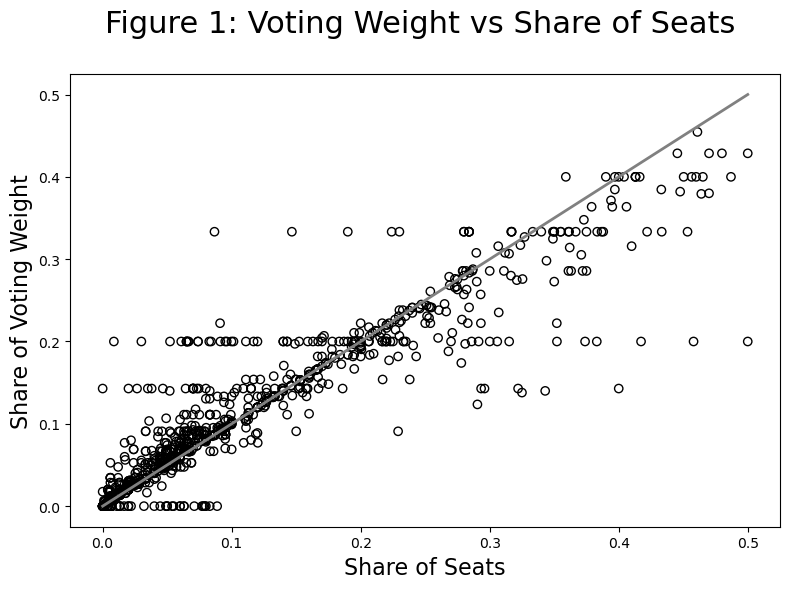

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "All_data_coalitions.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Identify all election dates where a party had a majority (share_seats > 0.5)
majority_dates = df[df['share_seats'] > 0.5]['election_date'].unique()

# Remove all rows from those elections
filtered_df = df[~df['election_date'].isin(majority_dates)]

# Create the plot with empty black circles and a 45-degree line
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['share_seats'], filtered_df['share_voting_weight'],
            facecolors='none', edgecolors='black', marker='o', alpha=1)
plt.plot([0, 0.5], [0, 0.5], color='gray', linestyle='-', linewidth=2, zorder=3)
plt.xlabel('Share of Seats', fontsize=16)
plt.ylabel('Share of Voting Weight', fontsize=16)
plt.title('Figure 1: Voting Weight vs Share of Seats \n', fontsize=22)
plt.grid(False)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_excel('All_data_coalitions.xlsx')

# FM counts as +1
df['adjusted_cab_pos'] = df['cab_pos'] + df['FM'].fillna(0)
# PM counts as +2
df['adjusted_cab_pos_PM'] = df['adjusted_cab_pos'] + 2 * df['PM'].fillna(0)
# Share of adjusted cabinet positions per government
df['adjusted_share_cab_pos_PM'] = df.groupby('election_date')['adjusted_cab_pos_PM'].transform(lambda x: x / x.sum())

df = df.dropna(subset=['adjusted_share_cab_pos_PM'])

X1 = sm.add_constant(df['gov_weight_share'])
y = df['adjusted_share_cab_pos_PM']
model1 = sm.OLS(y, X1).fit()
print(model1.summary())


X2 = sm.add_constant(df[['F', 'gov_weight_share']].fillna(0))
model2 = sm.OLS(y, X2).fit()
print(model2.summary())


X3 = sm.add_constant(df['gov_seat_share'])
model3 = sm.OLS(y, X3).fit()
print(model3.summary())


X4 = sm.add_constant(df[['F', 'gov_seat_share']].fillna(0))
model4 = sm.OLS(y, X4).fit()
print(model4.summary())

X1 = sm.add_constant(df['gov_weight_share'])
y = df['adjusted_share_cab_pos'] 
model1 = sm.OLS(y, X1).fit()
print(model1.summary())
X2 = sm.add_constant(df[['F', 'gov_weight_share']].fillna(0))
model2 = sm.OLS(y, X2).fit()
print(model2.summary())
X3 = sm.add_constant(df['gov_seat_share'])
model3 = sm.OLS(y, X3).fit()
print(model3.summary())

X4 = sm.add_constant(df[['F', 'gov_seat_share']].fillna(0))
model4 = sm.OLS(y, X4).fit()
print(model4.summary())

                                OLS Regression Results                               
Dep. Variable:     adjusted_share_cab_pos_PM   R-squared:                       0.843
Model:                                   OLS   Adj. R-squared:                  0.842
Method:                        Least Squares   F-statistic:                     1536.
Date:                       Sat, 31 May 2025   Prob (F-statistic):          5.21e-117
Time:                               19:20:01   Log-Likelihood:                 253.93
No. Observations:                        288   AIC:                            -503.9
Df Residuals:                            286   BIC:                            -496.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

KeyError: 'adjusted_share_cab_pos'